## **Mean-Median Imputation**

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
titanic_df = pd.read_csv('D:/Academics/AI/Data Sets/Titanic.csv')

In [32]:
titanic_df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [60]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [61]:
titanic_df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [65]:
print(X_train.shape)
print(X_test.shape)

(712, 3)
(179, 3)


In [66]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [67]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [68]:
X_train['mean_age'] = X_train['Age'].fillna(mean_age)
X_train['median_age'] = X_train['Age'].fillna(median_age)

X_train['mean_fare'] = X_train['Age'].fillna(mean_fare)
X_train['median_fare'] = X_train['Age'].fillna(median_fare)

In [69]:
#X_train.sample(5)

In [70]:
print('Original Age variable variance', X_train['Age'].var())
print('Age variance after Mean Imputation', X_train['mean_age'].var())
print('Age variance after Median Imputation', X_train['median_age'].var())
print('-------------------------------------------------------------------')
print('Original Fare variable variance', X_train['Fare'].var())
print('Fare variance after Mean Imputation', X_train['mean_fare'].var())
print('Fare variance after Median Imputation', X_train['median_fare'].var())

Original Age variable variance 204.34951339046142
Age variance after Mean Imputation 161.81262452718676
Age variance after Median Imputation 161.98956633460548
-------------------------------------------------------------------
Original Fare variable variance 2448.1979137063163
Fare variance after Mean Imputation 163.13478280526172
Fare variance after Median Imputation 200.55085535155044


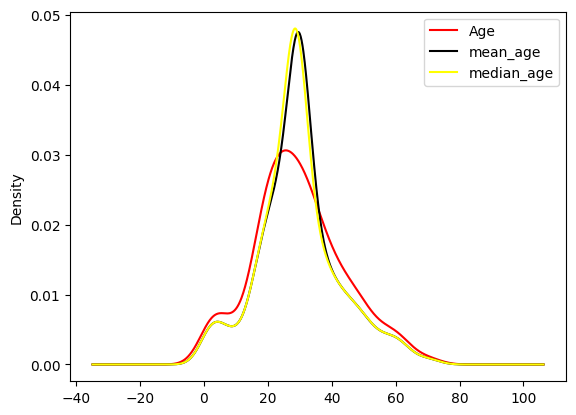

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable Distribution
X_train['Age'].plot(kind='kde', ax=ax, color='red')

# Variable Imputation with Mean
X_train['mean_age'].plot(kind='kde', ax=ax, color='black')

#Variable Imputation with Median
X_train['median_age'].plot(kind='kde', ax=ax, color='yellow')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

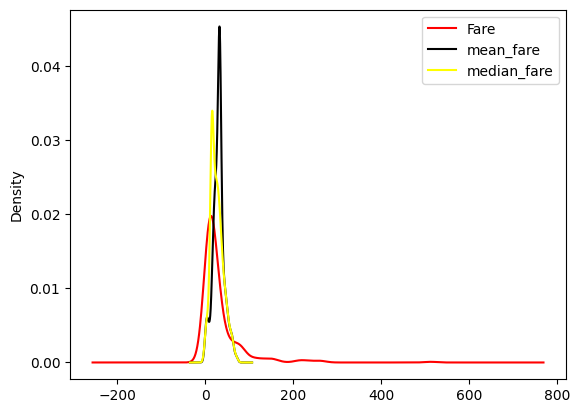

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable Distribution
X_train['Fare'].plot(kind='kde', ax=ax, color='red')

# Variable Imputation with Mean
X_train['mean_fare'].plot(kind='kde', ax=ax, color='black')

#Variable Imputation with Median
X_train['median_fare'].plot(kind='kde', ax=ax, color='yellow')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<Axes: >

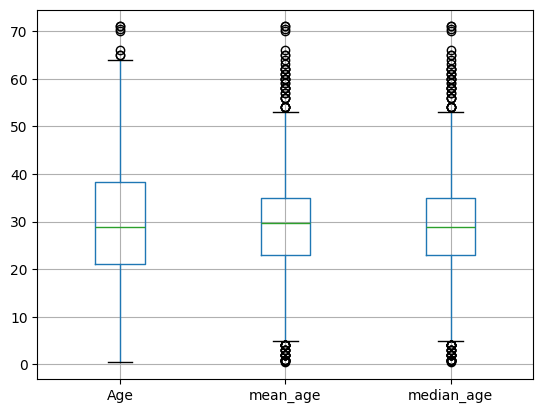

In [ ]:
X_train[['Age', 'mean_age', 'median_age']].boxplot()

In [ ]:
X_train[['Fare', 'mean_fare', 'median_fare']].boxplot()

### **Mean-Median Imputation using Sklearn**

In [46]:
from sklearn.impute import SimpleImputer

In [47]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [48]:
from sklearn.compose import ColumnTransformer

In [49]:
trf = ColumnTransformer([('imputer1', imputer1, ['Age']), ('imputer2', imputer2, ['Fare'])], remainder='passthrough')

In [50]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [51]:
trf.named_transformers_['imputer1'].statistics_

array([29.78590426])

In [52]:
trf.named_transformers_['imputer2'].statistics_

array([14.4583])

In [53]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [54]:
X_train

array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   0.        ],
       [ 29.78590426,  25.925     ,   0.        ]])